In [2]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
#  Load and preprocess the data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [3]:
# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Normalize features to range [0, 1]
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=2))
])

In [6]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [8]:
#Evaluate the model on test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Model Accuracy on Test Set: 97.78%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [9]:
#Cross-validation for robustness
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy Scores: [0.93333333 0.96666667 0.9        0.86666667 1.        ]
Mean Cross-Validation Accuracy: 93.33%


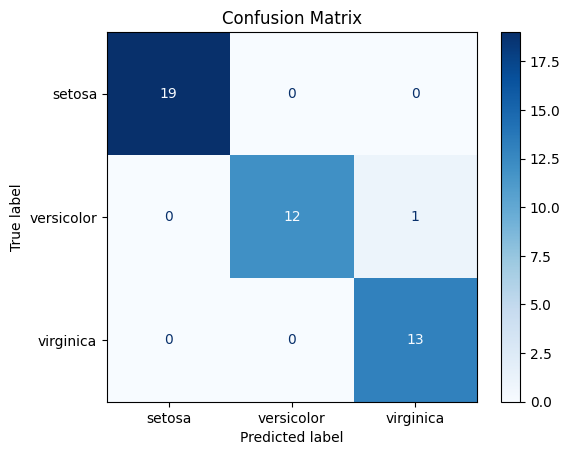

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


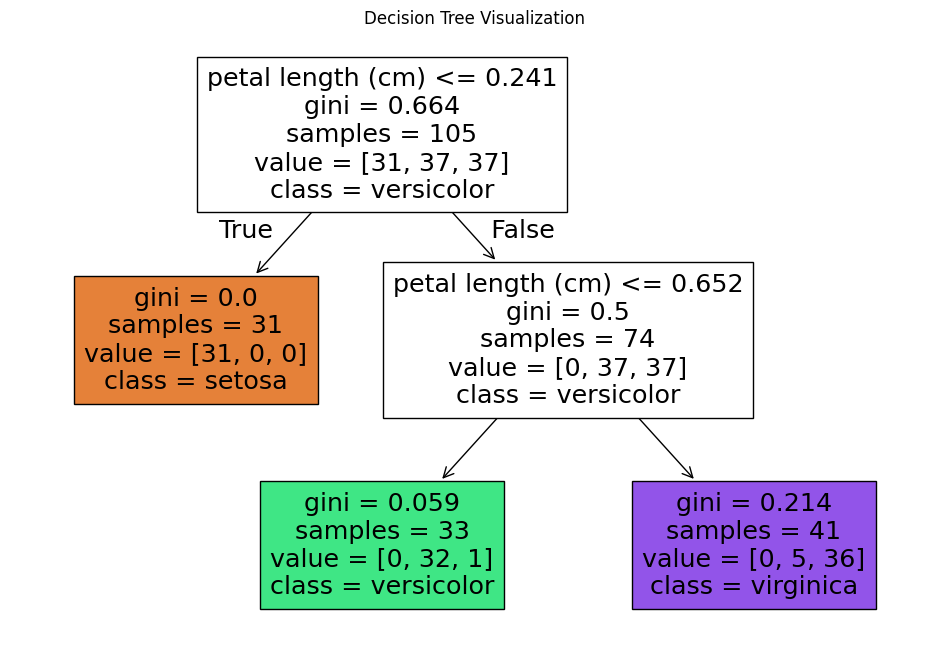

In [11]:
#  Visualization of the Decision Tree
classifier = pipeline.named_steps['classifier']
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [13]:
#Predict on new data
sample = np.array([[5.0, 3.5, 1.5, 0.2]])  # Example input
predicted_class = pipeline.predict(sample)
print("\nPrediction for sample:", data.target_names[predicted_class][0])


Prediction for sample: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
